In [15]:
buytest=read.csv("Regression/buytest.csv", header=T)

In [16]:
buytest$RESPOND=as.factor(buytest$RESPOND)
buytest$MARRIED=as.factor(buytest$MARRIED)
buytest$COA6=as.factor(buytest$COA6)
buytest$OWNHOME=as.factor(buytest$OWNHOME)
buytest$CLIMATE=as.factor(buytest$CLIMATE)
buytest$DISCBUY=as.factor(buytest$DISCBUY)
buytest$SEX=as.factor(buytest$SEX)
buytest$ORGSRC=as.factor(buytest$ORGSRC)
buytest$RETIURN24=as.factor(buytest$RETURN24)
buytest$LOC=as.factor(buytest$LOC)

In [17]:
buytest1=buytest[,1:18]

In [18]:
str(buytest)

'data.frame':	10000 obs. of  27 variables:
 $ ID       : Factor w/ 10000 levels "000054889","000219612",..: 11 18 25 101 140 150 162 178 187 209 ...
 $ RESPOND  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AGE      : int  71 53 53 45 32 35 43 39 66 NA ...
 $ INCOME   : int  67 72 70 56 66 48 49 64 65 NA ...
 $ SEX      : Factor w/ 3 levels "","F","M": 3 3 2 2 2 2 2 3 3 1 ...
 $ MARRIED  : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 NA ...
 $ FICO     : int  719 751 725 684 651 691 694 659 692 707 ...
 $ OWNHOME  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 NA ...
 $ LOC      : Factor w/ 8 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CLIMATE  : Factor w/ 3 levels "10","20","30": 1 1 1 1 1 1 1 1 1 1 ...
 $ BUY6     : int  1 0 1 0 0 0 0 0 0 0 ...
 $ BUY12    : int  1 0 1 0 0 0 0 0 0 0 ...
 $ BUY18    : int  1 0 1 1 0 0 0 0 0 0 ...
 $ VALUE24  : int  318 83 265 448 161 250 194 446 214 198 ...
 $ ORGSRC   : Factor w/ 8 levels "","C","D","I",..: 5 7 3 5 7 2 7 3 5 5 

In [19]:
set.seed(123456) 
ind <- sample(2, nrow(buytest1), replace=T, prob=c(0.7, 0.3))
trainData <- buytest1[ind==1,]
testData <- buytest1[ind==2,]

In [20]:
##### R for Neural Network#############
library(nnet)

In [21]:
nn_train <- nnet(RESPOND ~ AGE+INCOME , data=trainData, size=4)
# nnet의  옵션
# size : hidden node 수 
# maxit : 반복횟수

# weights:  17
initial  value 4916.069014 
iter  10 value 1787.171104
iter  20 value 1772.733513
iter  30 value 1771.703371
iter  40 value 1763.642005
iter  50 value 1762.835645
iter  60 value 1761.100351
final  value 1761.092096 
converged


nnet의  옵션 <br/>
size : hidden node 수 <br/>
maxit : 반복횟수

In [23]:
summary(nn_train)

a 2-4-1 network with 17 weights
options were - entropy fitting 
  b->h1  i1->h1  i2->h1 
  -0.20   -0.44   -0.63 
  b->h2  i1->h2  i2->h2 
-194.84    6.98   -0.40 
  b->h3  i1->h3  i2->h3 
  -2.37  -39.91  -48.60 
  b->h4  i1->h4  i2->h4 
  -0.50   -1.57   -1.12 
   b->o   h1->o   h2->o   h3->o   h4->o 
  -1.59    0.23   -1.06    4.94    0.58 

입력 노드 2 - 은닉 노드 4 - 출력 노드 1 신경망<br/>
b는 상수, i는 변수

In [22]:
library(devtools)
source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

Loading required package: usethis

SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d



Loading required package: scales

Loading required package: reshape



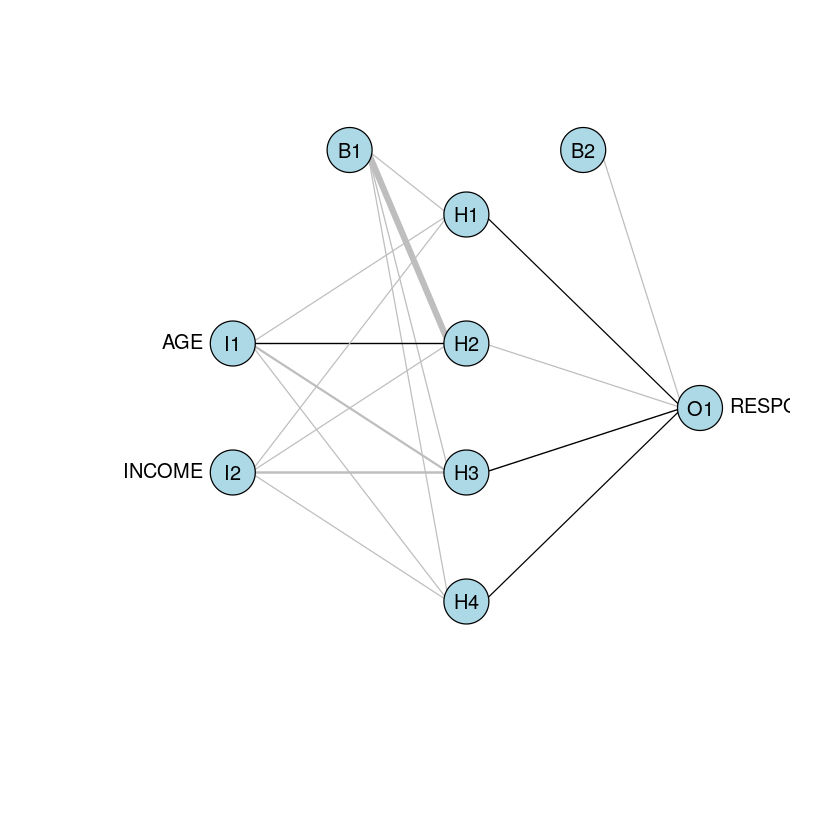

In [24]:
plot.nnet(nn_train)
p_nn1<-predict(nn_train, trainData)


In [28]:
confusion.matrix=table(trainData$RESPOND, p_nn1>0.1)

   
    FALSE TRUE
  0  5906  427
  1   416   84

In [25]:
round(prop.table(confusion.matrix) * 100, digit = 1)

   
    FALSE TRUE
  0  86.4  6.2
  1   6.1  1.2

In [26]:
p_nn2<-predict(nn_train, newdata=testData)
table(testData$RESPOND, p_nn2>0.1)

   
    FALSE TRUE
  0  2519  183
  1   202   29

In [29]:
confusion.matrix=table(testData$RESPOND, p_nn2>0.1)

In [30]:
round(prop.table(confusion.matrix) * 100, digit = 1)

   
    FALSE TRUE
  0  85.9  6.2
  1   6.9  1.0